In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import *


# This how the raw dataset looks like
## This shows the first 10 rows


In [2]:
data=pd.read_csv('car_web_scraped_dataset.csv')
data.head(10)

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"
5,Honda Civic,2020,"29,026 miles","Silver exterior, Black interior","1 accident reported, 1 Owner","$21,000"
6,Honda Accord,2019,"4,148 miles","Black exterior, Black interior","1 accident reported, 1 Owner","$20,998"
7,Mercedes-Benz GLC,2018,"57,602 miles","Blue exterior, Unknown interior","1 accident reported, 3 Owners","$18,887"
8,Honda Civic,2020,"50,240 miles","Black exterior, Black interior","1 accident reported, 1 Owner","$19,498"
9,BMW 5 Series,2013,"56,766 miles","White exterior, Black interior","No accidents reported, 3 Owners","$17,998"


# Clean up data

In [3]:
data = data.drop_duplicates()
data.info()
data1=data
data2=data
data3=data
data4=data
data['brand'] = list(map(lambda x: x.split(" ")[0],data['name']))
data['make'] = list(map(lambda x: x.split(" ")[1],data['name']))
data['car_color'] = list(map(lambda x: x.split(" ")[0],data['color']))
data['interior_color'] = list(map(lambda x: x.split(",")[1].split(" ")[1],data['color']))
data['title'] = list(map(lambda x: "clean" if x.split(" ")[0]=="No" else "rebuilt",data['condition']))
data['previous_owners'] = list(map(lambda x: x.split(",")[1].split(" ")[1],data['condition']))
data['accidents'] = list(map(lambda x: 0 if x.split(" ")[0]=="No" else int(x.split(" ")[0]),data['condition']))
data['price'] = data['price'].replace({'\\$': '', ',': ''}, regex=True).astype(int)

def clean_miles(miles):
    if isinstance(miles, str):
        return int(miles.replace(',', '').replace(' miles', ''))
    return miles

data['miles'] = data['miles'].apply(clean_miles)
data.head(10)


<class 'pandas.core.frame.DataFrame'>
Index: 2312 entries, 0 to 2839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2312 non-null   object
 1   year       2312 non-null   int64 
 2   miles      2312 non-null   object
 3   color      2312 non-null   object
 4   condition  2312 non-null   object
 5   price      2312 non-null   object
dtypes: int64(1), object(5)
memory usage: 126.4+ KB


,name,year,miles,color,condition,price,brand,make,car_color,interior_color,title,previous_owners,accidents
0,Kia Forte,2022,41406,"Gray exterior, Black interior","No accidents reported, 1 Owner",15988,Kia,Forte,Gray,Black,clean,1,0
1,Chevrolet Silverado 1500,2021,15138,"White exterior, Black interior","1 accident reported, 1 Owner",38008,Chevrolet,Silverado,White,Black,rebuilt,1,1
2,Toyota RAV4,2022,32879,"Silver exterior, Unknown interior","No accidents reported, 1 Owner",24988,Toyota,RAV4,Silver,Unknown,clean,1,0
3,Honda Civic,2020,37190,"Blue exterior, Black interior","No accidents reported, 1 Owner",18998,Honda,Civic,Blue,Black,clean,1,0
4,Honda Civic,2020,27496,"Black exterior, Black interior","No accidents reported, 1 Owner",19498,Honda,Civic,Black,Black,clean,1,0
5,Honda Civic,2020,29026,"Silver exterior, Black interior","1 accident reported, 1 Owner",21000,Honda,Civic,Silver,Black,rebuilt,1,1
6,Honda Accord,2019,4148,"Black exterior, Black interior","1 accident reported, 1 Owner",20998,Honda,Accord,Black,Black,rebuilt,1,1
7,Mercedes-Benz GLC,2018,57602,"Blue exterior, Unknown interior","1 accident reported, 3 Owners",18887,Mercedes-Benz,GLC,Blue,Unknown,rebuilt,3,1
8,Honda Civic,2020,50240,"Black exterior, Black interior","1 accident reported, 1 Owner",19498,Honda,Civic,Black,Black,rebuilt,1,1
9,BMW 5 Series,2013,56766,"White exterior, Black interior","No accidents reported, 3 Owners",17998,BMW,5,White,Black,clean,3,0


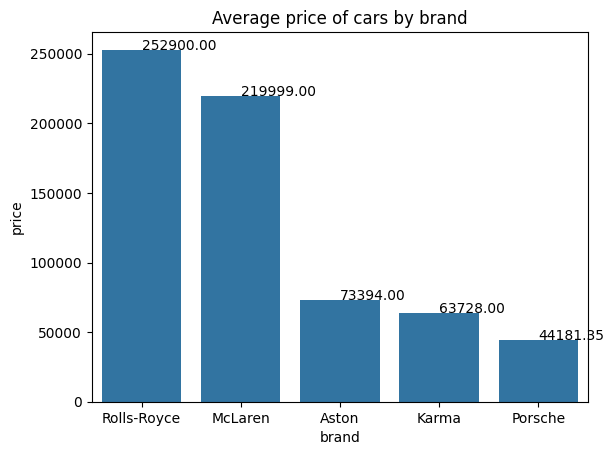

In [4]:
i = data.groupby('brand')['price'].mean().sort_values(ascending=False).head(5).reset_index()               
sns.barplot(data=i,x=i['brand'],y=i['price'] )
plt.title('Average price of cars by brand')
for i,data in enumerate(i['price']):
    plt.text(i,data,s= f'{data:.2f}')

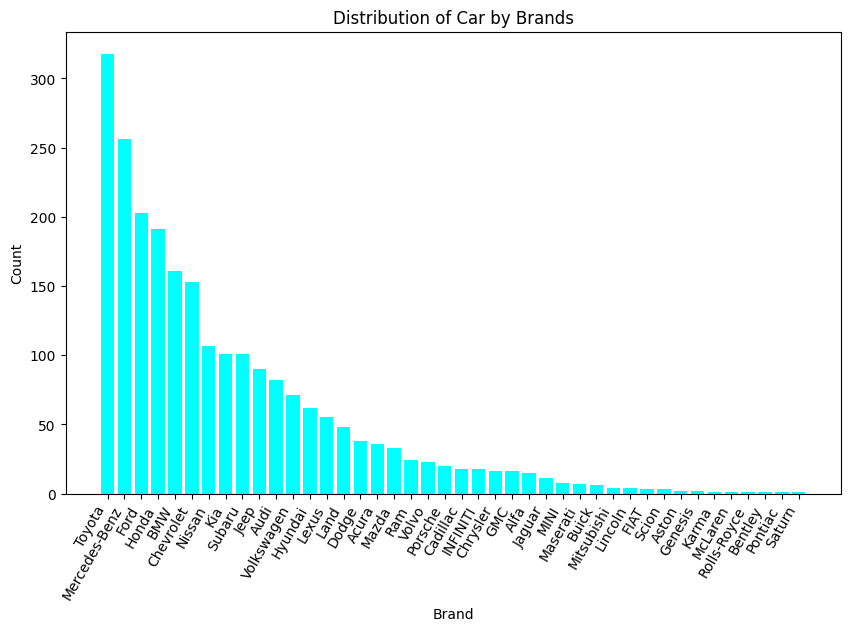

In [5]:
figData = data1['brand'].value_counts().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(figData['brand'], figData['count'], color='cyan')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Distribution of Car by Brands')
plt.xticks(rotation=60, ha='right')
plt.show()



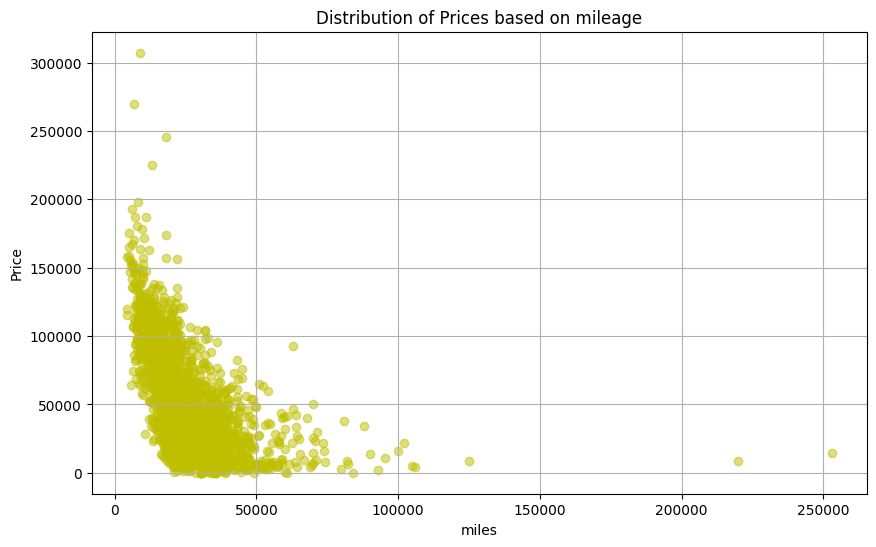

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data2['price'], data2['miles'], color='y', alpha=0.5)
plt.title('Distribution of Prices based on mileage')
plt.xlabel('miles')
plt.ylabel('Price')
plt.grid(True)

plt.show()

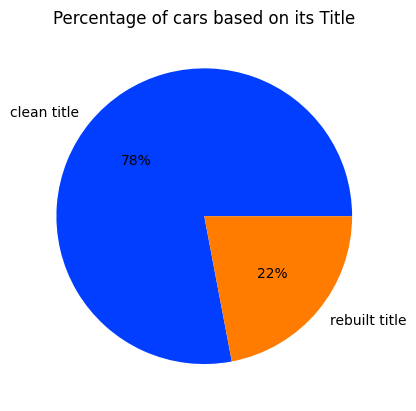

In [7]:
figData = data3['title'].value_counts().reset_index()
counts = figData['count'] 
keys = list(map(lambda x: x+ ' title',figData['title'])) 
palette_color = sns.color_palette('bright')  
plt.pie(counts, labels=keys, colors=palette_color, autopct='%.0f%%') 
plt.title('Percentage of cars based on its Title')  
plt.show() 



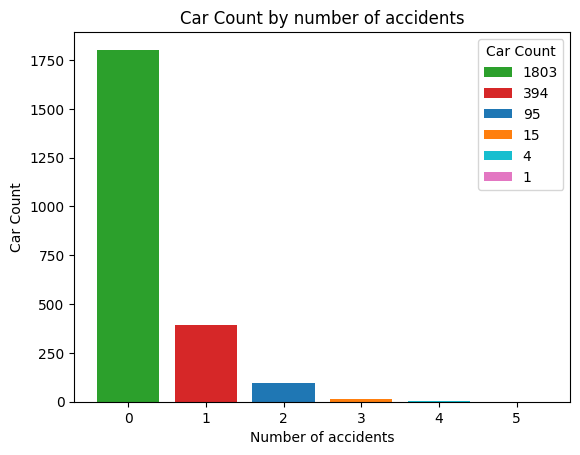

In [8]:
accidentsData = data3['accidents'].value_counts().reset_index()
fig, ax = plt.subplots()
accidentsValue = accidentsData['count'] 
accidentskeys = accidentsData['accidents']
bar_colors = ['tab:green','tab:red', 'tab:blue', 'tab:orange', 'tab:cyan','tab:pink',]
ax.bar(accidentskeys, accidentsValue , color=bar_colors, label=accidentsValue)
ax.set_title('Car Count by number of accidents')
ax.legend(title='Car Count')
ax.set_ylabel('Car Count')
ax.set_xlabel('Number of accidents')
plt.show()

# Adding columns to our dataset
## This code will add the following columns:-
 1-Average price for car brand
 2-Average price for car model
 3-Averge price of car based on both brand and model together
 4- Average price for car based on it's color
 

In [9]:
from sklearn.ensemble import RandomForestClassifier
e= data4.groupby('make')['price'].mean().sort_values(ascending=False).reset_index()
e['make_factor'] = list(map(lambda x: x/e['price'][270],e['price']))

i = data4.groupby('brand')['price'].mean().sort_values(ascending=False).reset_index()

i['brand_factor'] = list(map(lambda x: x/i['price'][41],i['price']))

c = data4.groupby('car_color')['price'].mean().sort_values(ascending=False).reset_index()

c['color_factor'] = list(map(lambda x: x/c['price'][13],c['price']))
av = data4.groupby('name')['price'].mean().sort_values(ascending=False).reset_index()

av['avg_price'] = list(map(lambda x: x/av['price'][308],av['price']))

print(av)
data4['brand_factor'] = list(map(lambda x: i.loc[i['brand'] == x, 'brand_factor'].iloc[0],data4['brand']))
data4['make_factor'] = list(map(lambda x: e.loc[e['make'] == x, 'make_factor'].iloc[0],data4['make']))
data4['color_factor'] = list(map(lambda x: c.loc[c['car_color'] == x, 'color_factor'].iloc[0],data4['car_color']))
data4['avg_price'] = list(map(lambda x: av.loc[av['name'] == x, 'avg_price'].iloc[0],data4['name']))



                     name     price  avg_price
0        Rolls-Royce Dawn  252900.0  45.168780
1            McLaren 720S  219999.0  39.292552
2         Audi RS 6 Avant  124995.0  22.324522
3    Aston Martin Vantage  105888.0  18.911949
4                 Audi R8   88000.0  15.717092
..                    ...       ...        ...
304             Volvo S80    6495.0   1.160029
305           Ford Taurus    5998.0   1.071263
306     Volkswagen Routan    5995.0   1.070727
307     Subaru B9 Tribeca    5995.0   1.070727
308           Saturn Aura    5599.0   1.000000

[309 rows x 3 columns]


# Random Forest Regressor


In [10]:
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')
predictors=['brand_factor','make_factor','miles', 'year','previous_owners','avg_price','color_factor','accidents', ]
X = data4.loc[:, predictors]
y = data4.loc[:, ['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=1, oob_score=True)

# Fit the regressor with x and y data
#regressor.fit(X, y)
regressor.fit(X_train, y_train)
# Access the OOB Score


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=1)

# Metric Evalution of Random Forest Regressor
## Out-of-Bag Score, Mean Squared Error and R-squared


In [11]:
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(X_test)
#sheko = regressor.predict([( 25,3,180000,2020,1)])
#print(sheko)
# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.7586539778780114
Mean Squared Error: 26507688.97731834
R-squared: 0.8233970644954618


# Check it out
## Fill this form to predict your car price

In [12]:



brandData = data2['brand'].value_counts().reset_index()
brandNames = sorted(brandData['brand'])
brandDropdown = widgets.Dropdown(
    options= brandNames,
    value=None,
    description='Brand:'
)

d2= widgets.Dropdown(description='Model:')
def updateDropdown(arg):
    d2.options = sorted(set(data2.loc[data2['brand'] == brandDropdown.value, 'make'].values))
brandDropdown.observe(updateDropdown)
def random_function():
    
    display(brandDropdown)
    display(d2)
interact(random_function,x = brandDropdown,y = d2) 

title = widgets.Dropdown(
    options=['Clean', 'Rebuilt'],
    value='Clean',
    description='Title:',
    disabled=False,
)
display(title)    

carColors = sorted(set(data2['car_color'].values))
color = widgets.Dropdown(
    options=carColors,
    value=carColors[0],
    description='Color:',
    disabled=False,
)
display(color)
year = widgets.IntSlider(
    value=2015,
    min=2000,
    max=2024,
    step=1,
    description='Year:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(year)
mileage = widgets.IntSlider(
    value=20000,
    min=0,
    max=200000,
    step=50,
    description='Mileage:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(mileage)


previousOwners = widgets.IntSlider(
    value=1,
    min=1,
    max=10,
    step=1,
    description='Owners:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(previousOwners)
accidents = widgets.IntSlider(
    value=0,
    min=0,
    max=6,
    step=1,
    description='Accidensts:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(accidents)
userInput =[0,0,0,0,0,0,0,0]
output = widgets.Output()
def onButtonClick(args):
    if(brandDropdown.value == None or d2.value == None):
        display('Please Enter required car data')
        return
    brandValue = data4.loc[data4['brand'] == brandDropdown.value, 'brand_factor'].iloc[0]
    userInput[0]=brandValue
    makeValue = data4.loc[data4['make'] == d2.value, 'make_factor'].iloc[0]
    userInput[1]=makeValue
    userInput[2]=mileage.value
    userInput[3] =year.value
    userInput[4] = previousOwners.value
    nameValue = brandDropdown.value + ' ' + d2.value
    avg_price_value = data4.loc[data4['name'] == nameValue, 'avg_price'].iloc[0]
    userInput[5] = avg_price_value
    colorValue = data4.loc[data4['car_color'] == color.value, 'color_factor'].iloc[0]
    userInput[6] = colorValue
    userInput[7] = accidents.value
    display(userInput)

    pred_price =regressor.predict([userInput])

    
    with output:
        print('The predicted price: '+ str(pred_price[0])+'$ \n\n')

button = widgets.Button(
    
    description='Calculate',
    disabled=False,
    button_style='success',
    tooltip='Click me',
    
)
button.on_click(onButtonClick)
display(button)
display(output)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

Dropdown(description='Title:', options=('Clean', 'Rebuilt'), value='Clean')

Dropdown(description='Color:', options=('Black', 'Blue', 'Brown', 'Gold', 'Gray', 'Green', 'Orange', 'Purple',…

IntSlider(value=2015, continuous_update=False, description='Year:', max=2024, min=2000)

IntSlider(value=20000, continuous_update=False, description='Mileage:', max=200000, step=50)

IntSlider(value=1, continuous_update=False, description='Owners:', max=10, min=1)

IntSlider(value=0, continuous_update=False, description='Accidensts:', max=6)

Button(button_style='success', description='Calculate', style=ButtonStyle(), tooltip='Click me')

Output()

[np.float64(4.753904467067532),
 np.float64(4.966638779481299),
 53850,
 2020,
 2,
 np.float64(4.966638779481299),
 np.float64(2.882124700786504),
 0]